<a href="https://colab.research.google.com/github/VaishnaviSawant19/covid-19dashbaord/blob/main/ARIMA_model_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
pip install pmdarima

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df=pd.read_csv("/content/sample_data/ARIMA Forecasting/case_time_series (2).csv",index_col='Date',parse_dates = True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (473, 7)


,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2020-01-30,2020-01-30,1,1,0,0,0,0
2020-01-31,2020-01-31,0,1,0,0,0,0
2020-02-01,2020-02-01,0,1,0,0,0,0
2020-02-02,2020-02-02,1,2,0,0,0,0
2020-02-03,2020-02-03,1,3,0,0,0,0


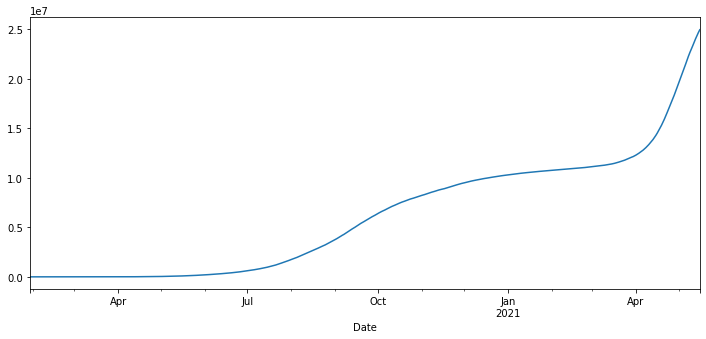

In [59]:
df['Total Confirmed'].plot(figsize=(12,5))

In [60]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest = adfuller(dataset,autolag = 'AIC')
  print("1. ADF : ", dftest[0])
  print("2. P-value : ", dftest[1])
  print("3. No of lags : ", dftest[2])
  print("4. No of Observations Used for ADF Regression and Critical Values Calculation: ", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key," : " ,val)


In [61]:
ad_test(df['Total Confirmed'])

1. ADF :  1.7872692776707708
2. P-value :  0.9983234306619795
3. No of lags :  15
4. No of Observations Used for ADF Regression and Critical Values Calculation:  457
5. Critical Values :
	 1%  :  -3.444740396477859
	 5%  :  -2.8678852001919073
	 10%  :  -2.570149751878151


In [62]:
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [63]:
stepwise_fit = auto_arima(df['Total Confirmed'], trace = True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=9651.216, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9699.777, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=9689.282, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=9687.796, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=9670.428, Time=0.36 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=9669.855, Time=0.29 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=9649.526, Time=0.39 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=9658.847, Time=0.49 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=9645.954, Time=0.65 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=9690.386, Time=0.15 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=9632.751, Time=0.84 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=9692.362, Time=0.39 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=9715.313, Time=1.82 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=inf, Time=1.83 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  473
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -4808.375
Date:                Mon, 17 May 2021   AIC                           9632.751
Time:                        09:56:19   BIC                           9665.990
Sample:                             0   HQIC                          9645.827
                                - 473                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0710      0.057      1.255      0.210      -0.040       0.182
ar.L2          0.5321      0.060      8.937      0.000       0.415       0.649
ar.L3          0.0094      0.044      0.213      0.831      -0.077       0.096
ar.L4          0.0794      0.042      1.892      0.059      -0.003       0.162
ar.L5          0.2092      0.050      4.172      0.000       0.111       0.308
ma.L1          0.0787      0.056      1.401      0.161      -0.031       0.189
ma.L2         -0.6941      0.059    -11.698      0.000      -0.810      -0.578
sigma2      4.747e+07   1.84e-09   2.58e+16      0.000    4.75e+07    4.75e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              4705.93
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):             228.86   Skew:                            -1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.12e+32. Standard errors may be unstable.
"""

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [65]:
print(df.shape)
train = df.iloc[:-30]
test  = df.iloc[:-30]
print(train.shape,test.shape)

(473, 7)
(443, 7) (443, 7)


In [66]:
model = ARIMA(train['Total Confirmed'],order=(5,2,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D2.Total Confirmed   No. Observations:                  441
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -4267.868
Method:                       css-mle   S.D. of innovations           3848.297
Date:                Mon, 17 May 2021   AIC                           8553.737
Time:                        09:56:43   BIC                           8590.538
Sample:                    02-01-2020   HQIC                          8568.253
                         - 04-16-2021                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      530.6175    254.787      2.083      0.037      31.244    1029.991
ar.L1.D2.Total Confirmed    -0.1605      0.057     -2.815      0.005      -0.272      -0.049
ar.L2.D2.Total Confirmed    -0.5813      0.052    -11.137      0.000      -0.684      -0.479
ar.L3.D2.Total Confirmed     0.1890      0.057      3.295      0.001       0.077       0.301
ar.L4.D2.Total Confirmed     0.1875      0.055      3.421      0.001       0.080       0.295
ar.L5.D2.Total Confirmed    -0.1962      0.055     -3.581      0.000      -0.304      -0.089
ma.L1.D2.Total Confirmed     0.2809      0.037      7.492      0.000       0.207       0.354
ma.L2.D2.Total Confirmed     0.8908      0.026     34.873      0.000       0.841       0.941
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2213           -0.9857j            1.0102           -0.2852
AR.2           -0.2213           +0.9857j            1.0102            0.2852
AR.3           -1.5525           -0.0000j            1.5525           -0.5000
AR.4            1.4753           -1.0196j            1.7934           -0.0962
AR.5            1.4753           +1.0196j            1.7934            0.0962
MA.1           -0.1577           -1.0477j            1.0595           -0.2738
MA.2           -0.1577           +1.0477j            1.0595            0.2738
-----------------------------------------------------------------------------
"""

In [79]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start,end,typ = 'levels').rename("Predictions")
print(pred)
#pred.index = df.index[start:end+1]
#print(pred)

2021-04-17    1.476798e+07
2021-04-18    1.501778e+07
2021-04-19    1.526445e+07
2021-04-20    1.551244e+07
2021-04-21    1.576248e+07
                  ...     
2022-06-29    1.732144e+08
2022-06-30    1.736926e+08
2022-07-01    1.741713e+08
2022-07-02    1.746506e+08
2022-07-03    1.751304e+08
Freq: D, Name: Predictions, Length: 443, dtype: float64


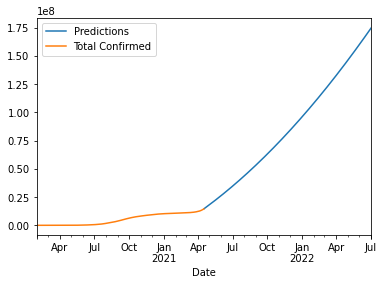

In [80]:
pred.plot(legend=True)
test['Total Confirmed'].plot(legend = True)

In [81]:
test['Total Confirmed'].mean()

5161052.981941309

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Total Confirmed']))
print(rmse)

91366089.70876324


In [83]:
model2=ARIMA(df['Total Confirmed'],order=(2,2,2))
model2=model2.fit()
df.tail()


,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2021-05-12,2021-05-12,362632,23703007,352005,19728566,4128,257762
2021-05-13,2021-05-13,343005,24046012,344676,20073242,4000,261762
2021-05-14,2021-05-14,326256,24372268,353200,20426442,3889,265651
2021-05-15,2021-05-15,310757,24683025,362547,20788989,4077,269728
2021-05-16,2021-05-16,281837,24964862,378526,21167515,4095,273823


In [84]:
index_future_dates=pd.date_range(start='2021-05-16',end='2021-06-15')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-05-16    2.523783e+07
2021-05-17    2.550872e+07
2021-05-18    2.577279e+07
2021-05-19    2.603413e+07
2021-05-20    2.629002e+07
2021-05-21    2.654297e+07
2021-05-22    2.679144e+07
2021-05-23    2.703698e+07
2021-05-24    2.727875e+07
2021-05-25    2.751772e+07
2021-05-26    2.775347e+07
2021-05-27    2.798662e+07
2021-05-28    2.821698e+07
2021-05-29    2.844497e+07
2021-05-30    2.867052e+07
2021-05-31    2.889394e+07
2021-06-01    2.911522e+07
2021-06-02    2.933458e+07
2021-06-03    2.955207e+07
2021-06-04    2.976786e+07
2021-06-05    2.998200e+07
2021-06-06    3.019463e+07
2021-06-07    3.040582e+07
2021-06-08    3.061568e+07
2021-06-09    3.082428e+07
2021-06-10    3.103172e+07
2021-06-11    3.123805e+07
2021-06-12    3.144337e+07
2021-06-13    3.164774e+07
2021-06-14    3.185122e+07
2021-06-15    3.205389e+07
Freq: D, Name: ARIMA Predictions, dtype: float64


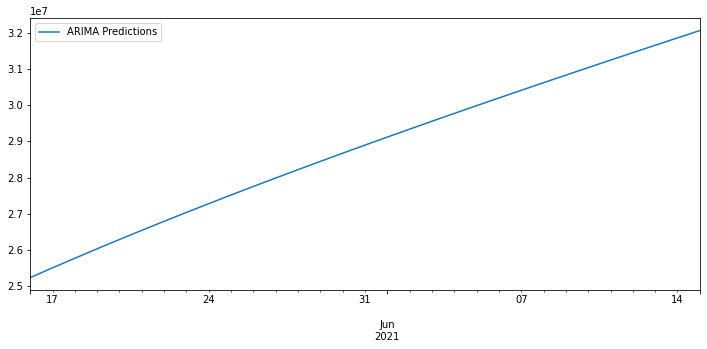

In [85]:
pred.plot(figsize=(12,5),legend=True)